In [ ]:
!pip install wordcloud

In [3]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.8/330.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.0 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=35428b121fefbfee6b3600542a5efa4c307a92b90042dec964fb5ec39fcb50b8
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/all-data.csv', encoding='latin-1', names=['sentiment', 'text'])

df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## EDA and Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
df = df[['text', 'sentiment']].dropna()
df['sentiment'].value_counts()

,count
sentiment,
neutral,2879
positive,1363
negative,604


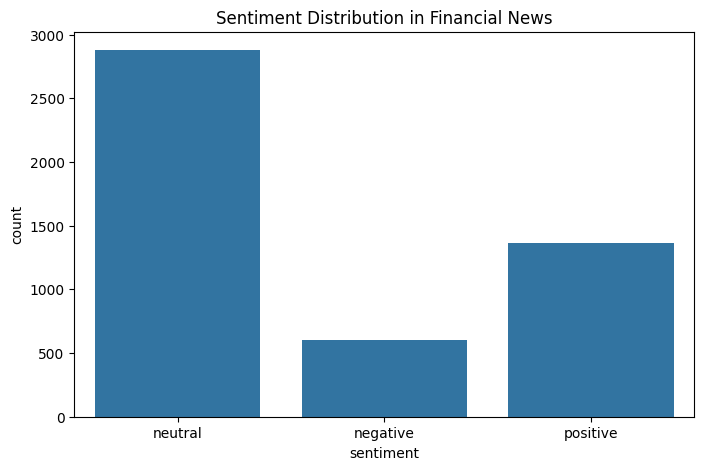

sentiment
neutral     0.594098
positive    0.281263
negative    0.124639
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution in Financial News')
plt.show()

# 計算比例
print(df['sentiment'].value_counts(normalize=True))

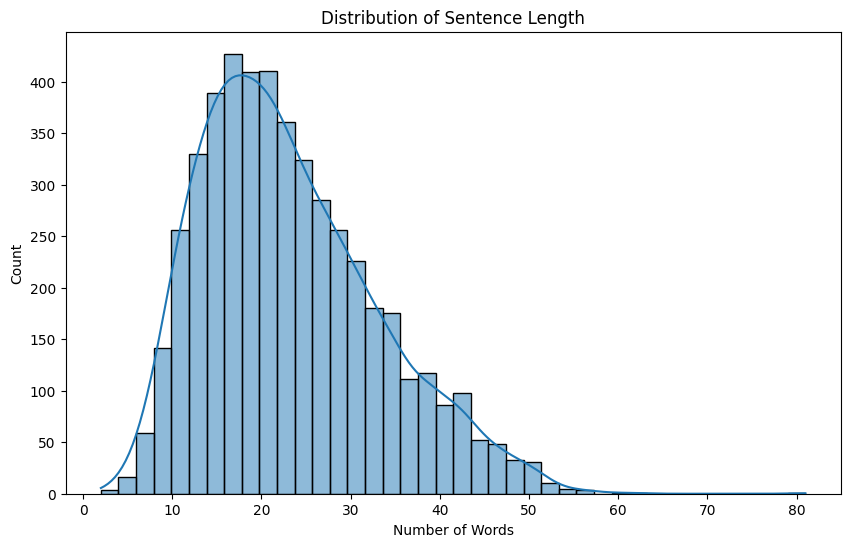

In [ ]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['text_len'], bins=40, kde=True)
plt.title('Distribution of Sentence Length')
plt.xlabel('Number of Words')
plt.show()

In [3]:
import re
def clean_finance_text(text):
    # 1. 轉小寫
    text = text.lower()
    # 2. 去除 URL 與 HTML 標籤
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # 3. 去除標點符號與特殊數字 (保留百分比)
    text = re.sub(r'[^\w\s%]', '', text)
    # 4. 去除多餘空格
    text = text.strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_finance_text)
df

,sentiment,text,cleaned_text
0,neutral,"According to Gran , the company has no plans t...",according to gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,the international electronic industry company ...
3,positive,With the new production plant the company woul...,with the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,according to the company s updated strategy fo...
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share prices ended lower i...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai s beer sales fell by 65 per cent to...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell to eur 354 mn from eur 6...
4844,negative,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...


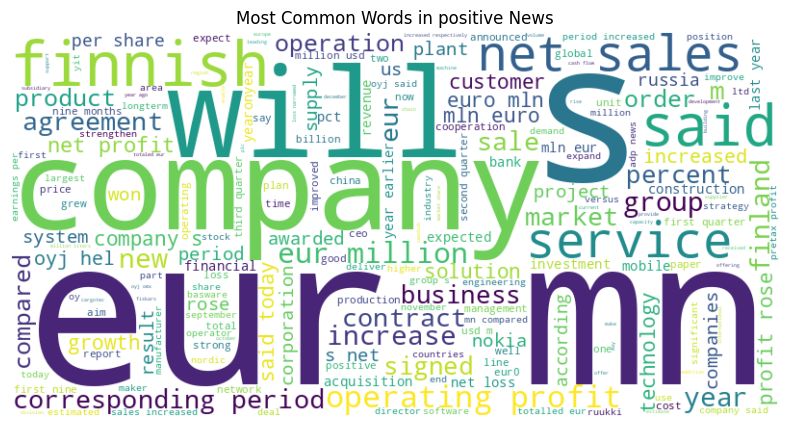

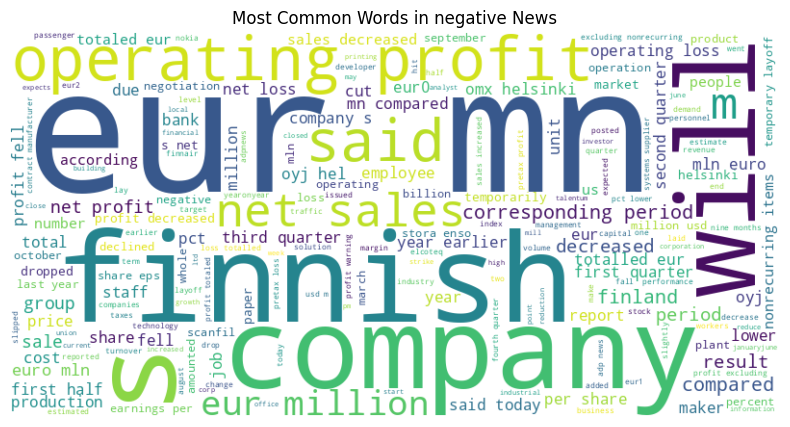

In [ ]:
from wordcloud import WordCloud

def show_wordcloud(sentiment_type):
    subset = " ".join(df[df['sentiment'] == sentiment_type]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subset)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {sentiment_type} News')
    plt.show()

# 分別查看 positive 與 negative
show_wordcloud('positive')
show_wordcloud('negative')

In [4]:
label_map = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

df['label'] = df['sentiment'].map(label_map)
df

,sentiment,text,cleaned_text,label
0,neutral,"According to Gran , the company has no plans t...",according to gran the company has no plans to...,1
1,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,the international electronic industry company ...,0
3,positive,With the new production plant the company woul...,with the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,according to the company s updated strategy fo...,2
...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share prices ended lower i...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai s beer sales fell by 65 per cent to...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell to eur 354 mn from eur 6...,0
4844,negative,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...,0


/tmp/ipython-input-3769680234.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_neg_words, palette='Reds_r')


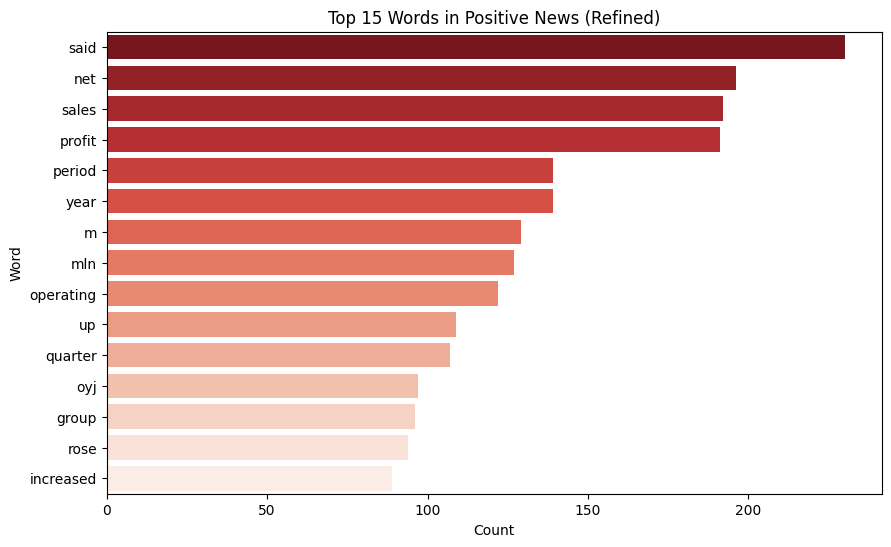

In [16]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def get_top_words(texts, n=15):
    all_words = " ".join(texts).lower().split()

    # 基本英文停用詞
    base_stops = ['the', 'a', 'an', 'in', 'on', 'at', 'of', 'to', 'is', 'for', 'and', 'with', 'as', 'by', 'that', 'it', 'its', 'was', 'from', 'be', 'has', 'are', 'have', 'were', 'will', 'would', 'could']

    # 財經/資料集特定雜訊
    finance_stops = ['eur', 'mn', 'million', 'finnish', 'company']

    # 合併停用詞
    stop_words = set(base_stops+finance_stops)

    # 過濾
    clean_words = [w for w in all_words if w not in stop_words and w.isalpha()]

    return pd.DataFrame(Counter(clean_words).most_common(n), columns=['word', 'count'])

# 重新抓取「正面」新聞的關鍵字
neg_df = df[df['label'] == 2]
top_neg_words = get_top_words(neg_df['text'], 15)

# 畫圖
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_neg_words, palette='Reds_r')
plt.title('Top 15 Words in Positive News (Refined)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

/tmp/ipython-input-3945997354.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_neg_words, palette='Reds_r')


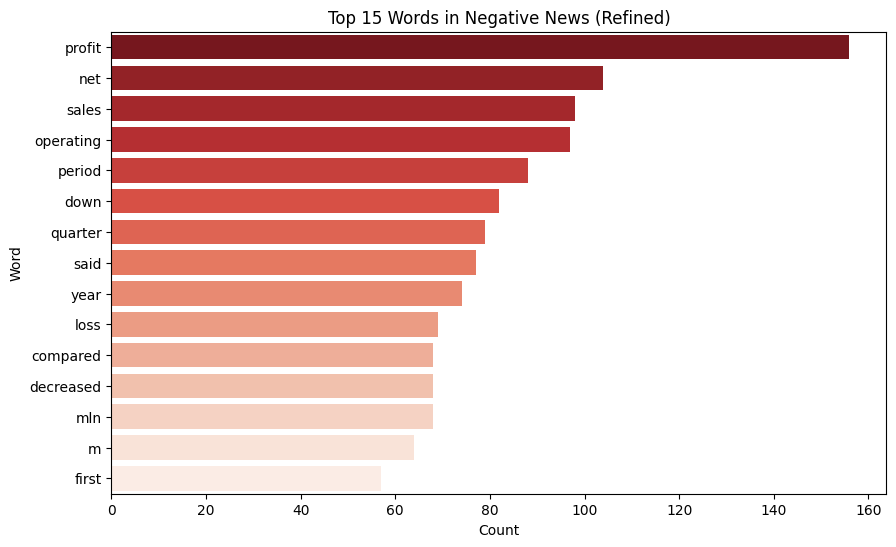

In [13]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def get_top_words(texts, n=15):
    all_words = " ".join(texts).lower().split()

    # 基本英文停用詞
    base_stops = ['the', 'a', 'an', 'in', 'on', 'at', 'of', 'to', 'is', 'for', 'and', 'with', 'as', 'by', 'that', 'it', 'its', 'was', 'from', 'be', 'has', 'are', 'have', 'were', 'will', 'would', 'could']

    # 財經/資料集特定雜訊
    finance_stops = ['eur', 'mn', 'million', 'finnish', 'company']

    # 合併停用詞
    stop_words = set(base_stops+finance_stops)

    # 過濾
    clean_words = [w for w in all_words if w not in stop_words and w.isalpha()]

    return pd.DataFrame(Counter(clean_words).most_common(n), columns=['word', 'count'])

# 重新抓取「負面」新聞的關鍵字
neg_df = df[df['label'] == 0]
top_neg_words = get_top_words(neg_df['text'], 15)

# 畫圖
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_neg_words, palette='Reds_r')
plt.title('Top 15 Words in Negative News (Refined)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

## Model Training

In [5]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['label']

# 80% 訓練, 20% 測試
# stratify=y 確保訓練集和測試集中，正負向新聞的比例維持一致
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training Data: {len(X_train)}")
print(f"Testing Data: {len(X_test)}")

Training Data: 3876
Testing Data: 970


### Baseline Model: Logistic Regression (Accuracy: 0.7144329896907217)

模型準確度 (Accuracy): 0.7144329896907217

詳細報告:
               precision    recall  f1-score   support

    Negative       0.71      0.32      0.44       121
     Neutral       0.72      0.94      0.81       576
    Positive       0.70      0.41      0.52       273

    accuracy                           0.71       970
   macro avg       0.71      0.56      0.59       970
weighted avg       0.71      0.71      0.68       970



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


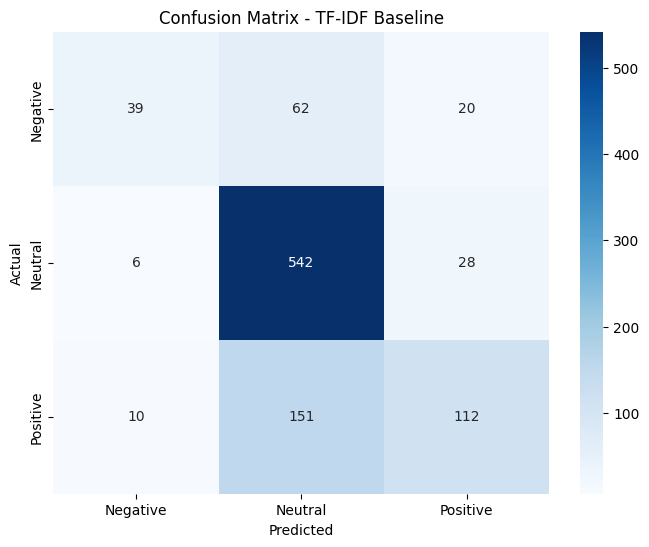

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. 設定 TF-IDF 轉換器
tfidf = TfidfVectorizer(
    max_features=5000,      # 只取最重要的 5000 個字
    ngram_range=(1, 2),     # 包含單字(good)和雙字詞(not good)
    stop_words='english'
)

# 2. 設定分類器 (Logistic Regression)
clf = LogisticRegression(solver='liblinear', multi_class='auto')

# 3. 建立 Pipeline
model_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

# 4. 訓練模型
model_pipeline.fit(X_train, y_train)

# 5. 預測
y_pred = model_pipeline.predict(X_test)

# 6. 評估結果
print("模型準確度 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n詳細報告:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# 7. Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - TF-IDF Baseline')
plt.show()

### BERT (Accuracy: 0.8422680412371134)

In [ ]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import sklearn

train_df = pd.DataFrame({'text': X_train, 'labels': y_train})
test_df = pd.DataFrame({'text': X_test, 'labels': y_test})

# 設定參數
model_args = {
    'num_train_epochs': 2,             # 訓練幾輪
    'train_batch_size': 16,            # 一次讀多少資料
    'overwrite_output_dir': True,      # 覆蓋舊結果
    'learning_rate': 2e-5,             # 學習率
    'no_cache': True,
    'fp16': True,
}

# 3. 建立模型
model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=3,
    args=model_args,
    use_cuda=True
)

# 4. 開始訓練
print("正在訓練")
model.train_model(train_df)

# 5. 評估模型
result, model_outputs, wrong_predictions = model.eval_model(test_df, acc=sklearn.metrics.accuracy_score)

print("BERT 模型準確度:", result['acc'])

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


正在訓練


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:924: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 2:   0%|          | 0/243 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:950: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 2:   0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:1570: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


BERT 模型準確度: 0.8422680412371134


  0%|          | 0/1 [00:00<?, ?it/s]

Predicting:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/simpletransformers/classification/classification_model.py:2260: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


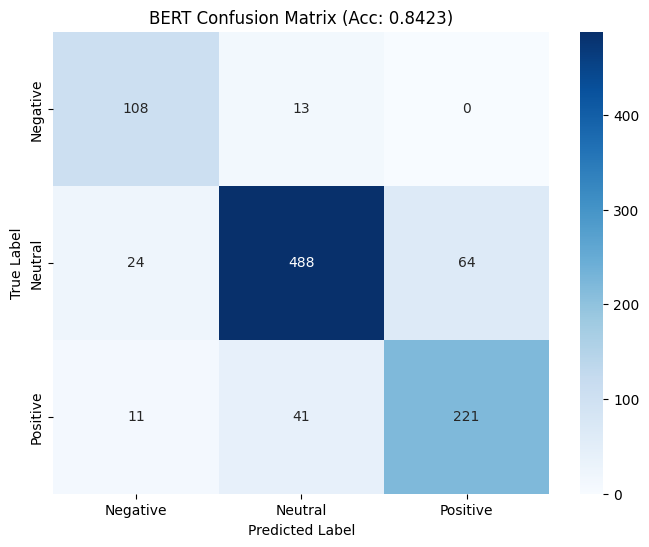

In [ ]:
# 1. 讓模型對測試集做預測
predictions, raw_outputs = model.predict(test_df['text'].tolist())

# 2. 建立混淆矩陣
cm = confusion_matrix(test_df['labels'], predictions)

# 3. 畫圖
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'BERT Confusion Matrix (Acc: {result["acc"]:.4f})')
plt.show()

In [ ]:
from google.colab import drive
import shutil
import os

drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/fiisual_project/bert_model"

if os.path.exists('outputs'):
    shutil.copytree('outputs', save_path, dirs_exist_ok=True)
else:
  print("not saved")

Mounted at /content/drive
